In [35]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator, export_text
import pydotplus
import io
%matplotlib inline

In [36]:
df = pd.read_csv('PredictingSignupsTrain.csv')
df

,Referrer,Location,Read_FAQ,Pages_Viewed,Service_Chosen
0,Slashdot,USA,Yes,Mid,None
1,Google,France,Yes,High,Premium
2,Digg,USA,Yes,High,Basic
3,Kiwitobes,France,Yes,High,Basic
4,Google,UK,No,Mid,Premium
5,(direct),'New Zealand',No,Low,None
6,(direct),UK,No,Mid,Basic
7,Google,USA,No,High,Premium
8,Slashdot,France,Yes,Mid,None
9,Digg,USA,No,Mid,None


In [37]:
from sklearn.datasets import load_iris
iris=load_iris()

In [38]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [40]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [41]:
type(iris.data)

numpy.ndarray

In [42]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [43]:
X= iris.data
y=iris.target

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print (X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [46]:
y_freq = np.bincount(y_train)
y_val = np.nonzero(y_freq)[0]
np.vstack((y_val,y_freq[y_val]))

array([[ 0,  1,  2],
       [34, 32, 39]], dtype=int64)

In [47]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X_train, y_train)

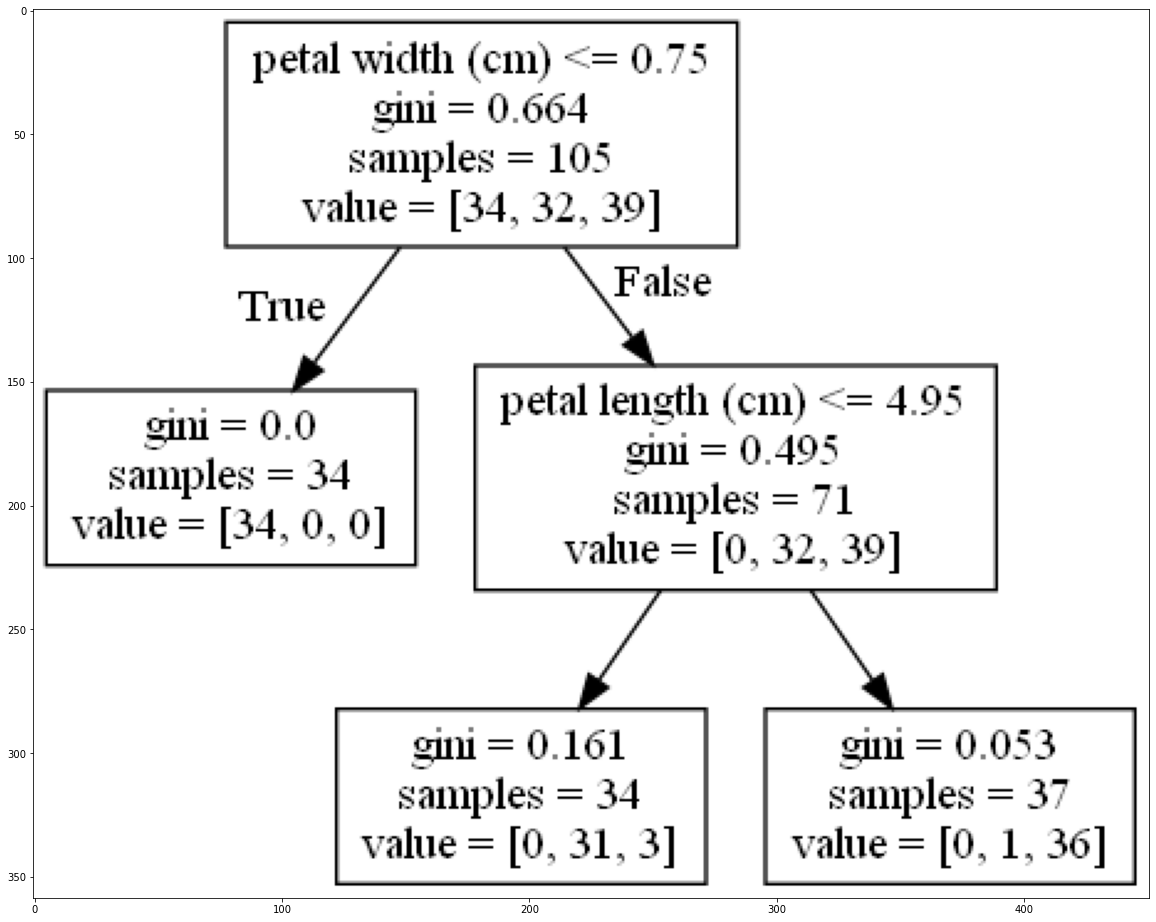

In [51]:
from sklearn.tree import export_graphviz
from scipy import misc
from matplotlib import pyplot as plt
import imageio
f = io.StringIO()
dot_data = export_graphviz(clf, out_file = f,
                          feature_names = iris.feature_names)
pydot_graph = pydotplus.graph_from_dot_data(f.getvalue())
pydot_graph.write_png("decision_tree.png")
img = imageio.imread("decision_tree.png")
plt.rcParams["figure.figsize"]=(20,20)
plt.imshow(img)